In [117]:
import networkx as nx
from collections import Counter
from kervis.dataset import Dataset
from kervis.utils import fetch_dataset
from grakel.kernels import GraphletSampling

In [118]:
G1 = nx.Graph()
G1.add_node(0, label=0)
G1.add_node(1, label=0)
G1.add_node(2, label=0)
G1.add_node(3, label=0)
G1.add_node(4, label=1)
G1.add_node(5, label=1)
G1.add_node(6, label=1)
G1.add_edges_from([
     (0,3),
     (1,3),
     (2,3),
     (3,4),
     (4,5),
     (4,6)])

G2 = nx.Graph()
G2.add_node(7, label=0)
G2.add_node(8, label=0)
G2.add_node(9, label=0)
G2.add_node(10, label=0)
G2.add_node(11, label=1)
G2.add_node(12, label=1)
G2.add_node(13, label=1)
G2.add_edges_from([
     (7,10),
     (8,10),
     (9,10),
     (10,11),
     (11,12),
     (11,13),
     (7,12),
     (9,13)])

In [119]:
k = 4

MUTAG = fetch_dataset("MUTAG", verbose=False)
GS = GraphletSampling(k)
GS.fit_transform(MUTAG.data)
GS._phi_X

/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/site-packages/grakel/kernels/graphlet_sampling.py:136: UserWarning: no implemented parallelization for GraphletSampling
  warnings.warn('no implemented parallelization for GraphletSampling')


array([[ 48.,  24.,   0.,   0.],
       [ 26.,  16.,   0.,   0.],
       [ 32.,  17.,   0.,   0.],
       [ 68.,  37.,   1.,   0.],
       [ 18.,  11.,   0.,   0.],
       [ 84.,  45.,   0.,   0.],
       [ 35.,  19.,   0.,   0.],
       [ 52.,  28.,   2.,   0.],
       [ 23.,  10.,   2.,   0.],
       [ 43.,  25.,   2.,   0.],
       [ 52.,  27.,   0.,   0.],
       [ 63.,  30.,   0.,   0.],
       [ 75.,  43.,   2.,   0.],
       [ 26.,  19.,   2.,   0.],
       [ 71.,  37.,   0.,   0.],
       [ 78.,  45.,   2.,   0.],
       [ 21.,  15.,   0.,   0.],
       [ 45.,  28.,   2.,   0.],
       [ 24.,  13.,   0.,   0.],
       [ 49.,  26.,   2.,   0.],
       [ 38.,  21.,   0.,   0.],
       [ 45.,  24.,   2.,   0.],
       [ 86.,  47.,   2.,   0.],
       [136.,  69.,   0.,   0.],
       [ 45.,  24.,   2.,   0.],
       [ 21.,  16.,   0.,   0.],
       [ 90.,  45.,   0.,   0.],
       [ 45.,  24.,   2.,   0.],
       [ 69.,  45.,   2.,   0.],
       [ 87.,  45.,   2.,   0.],
       [ 8

In [120]:
GS._graph_bins

{0: <grakel.kernels._isomorphism.bliss.Graph at 0x160ea34c0>,
 1: <grakel.kernels._isomorphism.bliss.Graph at 0x160ea31c0>,
 2: <grakel.kernels._isomorphism.bliss.Graph at 0x133aad040>,
 3: <grakel.kernels._isomorphism.bliss.Graph at 0x160eb7f70>}

In [121]:
graphlet = [g for g in nx.graph_atlas_g() if len(g.nodes())==k] # and len(list(nx.connected_components(g)))==1
print(len(graphlet))

11


In [122]:
from itertools import combinations

dataset = Dataset("MUTAG")

features = []
graph = dataset.graphs[0]

for graph in dataset.graphs:
    feature = []
    C = combinations(list(graph), k)
    for c in C:
        for i in range(len(graphlet)):
            if nx.is_isomorphic(graph.subgraph(c), graphlet[i]):
                feature.append((c, i))

    features.append(feature)

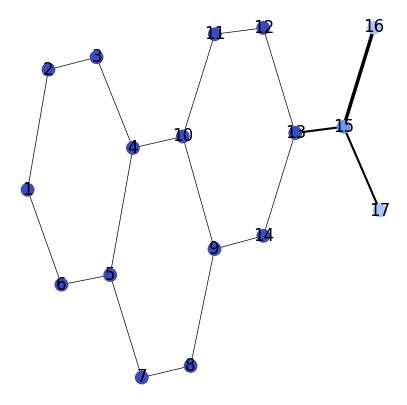

In [123]:
dataset.plot_graph(0, with_labels=True)

In [126]:
temp = []
for feature in features[0]:
    temp.append(feature[1])

Counter(temp)

Counter({6: 37, 2: 286, 3: 107, 1: 1080, 0: 864, 5: 6})

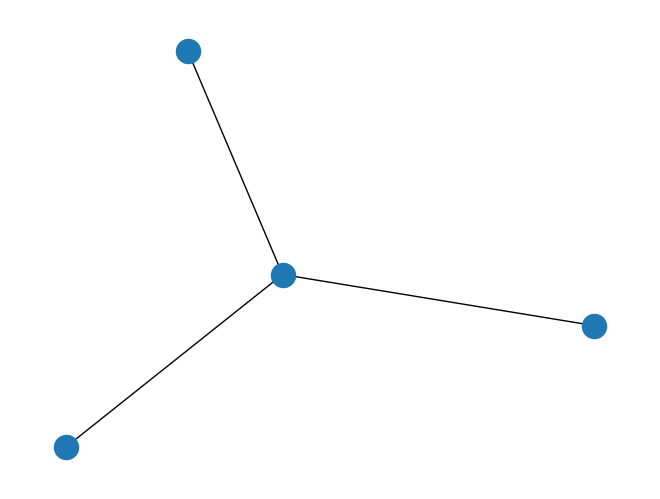

In [127]:
nx.draw(graphlet[5])